In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Loadig the Dataset

In [2]:
breast_df = pd.read_csv("/home/kennankole/Desktop/BIG/BreastCancer20201117/Breast_Cancer.csv")

In [4]:
breast_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


## Data pre-processing.
1. Our data has no column labels, let us name the columns

In [6]:
# Naming the columns according to the data source https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(original)
breast_df.rename({'0':"id",'1':'Clump Thickness', '2':'Uniformity of Cell Size', '3':'Uniformity of Cell Shape', '4':'Marginal Adhesion', '5':'Single Epithelial Cell Size', '6':'Bare Nuclei','7':'Bland Chromatin', '8':'Normal Nucleoli', '9':'Mitoses', '10':'Class'}, axis=1, inplace=True)
breast_df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


2. According to the metadata, the class column gives us the type of cancer in the cell. 2 is for **Benign** and 4 for **Malignant**

We then count the values of **Benign** and **Malignant** in the dataset.

In [10]:
breast_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

There are 458 patients with **Benign** and 241 patients with **Malignant** breast cancer.

3. We then view the data types for uniformity

In [12]:
breast_df.dtypes

id                              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object

The **Bare Nuclei** column is a string. 

We look at the column and see what types of strings are there.

In [16]:
breast_df['Bare Nuclei'].values

array(['1', '10', '2', '4', '1', '10', '10', '1', '1', '1', '1', '1', '3',
       '3', '9', '1', '1', '1', '10', '1', '10', '7', '1', '?', '1', '7',
       '1', '1', '1', '1', '1', '1', '5', '1', '1', '1', '1', '1', '10',
       '7', '?', '3', '10', '1', '1', '1', '9', '1', '1', '8', '3', '4',
       '5', '8', '8', '5', '6', '1', '10', '2', '3', '2', '8', '2', '1',
       '2', '1', '10', '9', '1', '1', '2', '1', '10', '4', '2', '1', '1',
       '3', '1', '1', '1', '1', '2', '9', '4', '8', '10', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '6', '10', '5', '5', '1', '3',
       '1', '3', '10', '10', '1', '9', '2', '9', '10', '8', '3', '5', '2',
       '10', '3', '2', '1', '2', '10', '10', '7', '1', '10', '1', '10',
       '1', '1', '1', '10', '1', '1', '2', '1', '1', '1', '?', '1', '1',
       '5', '5', '1', '?', '8', '2', '1', '10', '1', '10', '5', '3', '1',
       '10', '1', '1', '?', '10', '10', '1', '1', '3', '?', '2', '10',
       '1', '1', '1', '1', '1', '1', '10', '10'

Looking at the dataset, we find that it contains '?'

We have to remove this;dropping data is going to be our last option. 

In [17]:
breast_df[breast_df['Bare Nuclei'] == '?']

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
23,1057013,8,4,5,1,2,?,7,3,1,4
40,1096800,6,6,6,9,6,?,7,8,1,2
139,1183246,1,1,1,1,1,?,2,1,1,2
145,1184840,1,1,3,1,2,?,2,1,1,2
158,1193683,1,1,2,1,3,?,1,1,1,2
164,1197510,5,1,1,1,2,?,3,1,1,2
235,1241232,3,1,4,1,2,?,3,1,1,2
249,169356,3,1,1,1,2,?,3,1,1,2
275,432809,3,1,3,1,2,?,2,1,1,2
292,563649,8,8,8,1,2,?,6,10,1,4


In [19]:
breast_df[breast_df['Bare Nuclei']=='?'].sum()

id                                     13721250
Clump Thickness                              54
Uniformity of Cell Size                      39
Uniformity of Cell Shape                     46
Marginal Adhesion                            29
Single Epithelial Cell Size                  39
Bare Nuclei                    ????????????????
Bland Chromatin                              50
Normal Nucleoli                              44
Mitoses                                      16
Class                                        36
dtype: object

Let's replace "?" with "NaN"

In [20]:
breast_df.replace("?", np.nan, inplace=True)

In [26]:
breast_df['Bare Nuclei'].values

array(['1', '10', '2', '4', '1', '10', '10', '1', '1', '1', '1', '1', '3',
       '3', '9', '1', '1', '1', '10', '1', '10', '7', '1', nan, '1', '7',
       '1', '1', '1', '1', '1', '1', '5', '1', '1', '1', '1', '1', '10',
       '7', nan, '3', '10', '1', '1', '1', '9', '1', '1', '8', '3', '4',
       '5', '8', '8', '5', '6', '1', '10', '2', '3', '2', '8', '2', '1',
       '2', '1', '10', '9', '1', '1', '2', '1', '10', '4', '2', '1', '1',
       '3', '1', '1', '1', '1', '2', '9', '4', '8', '10', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '6', '10', '5', '5', '1', '3',
       '1', '3', '10', '10', '1', '9', '2', '9', '10', '8', '3', '5', '2',
       '10', '3', '2', '1', '2', '10', '10', '7', '1', '10', '1', '10',
       '1', '1', '1', '10', '1', '1', '2', '1', '1', '1', nan, '1', '1',
       '5', '5', '1', nan, '8', '2', '1', '10', '1', '10', '5', '3', '1',
       '10', '1', '1', nan, '10', '10', '1', '1', '3', nan, '2', '10',
       '1', '1', '1', '1', '1', '1', '10', '10'

We can now deal with NaN in python.

We replace the NaN values with the median of the column of Bare Nuclei

In [27]:
breast_df.median()

id                             1171710.0
Clump Thickness                      4.0
Uniformity of Cell Size              1.0
Uniformity of Cell Shape             1.0
Marginal Adhesion                    1.0
Single Epithelial Cell Size          2.0
Bare Nuclei                          1.0
Bland Chromatin                      3.0
Normal Nucleoli                      1.0
Mitoses                              1.0
Class                                2.0
dtype: float64

Bare Nuclei column has a median of 1, we use this value to replace it with NaN values in our column.

In [30]:
breast_df.fillna(breast_df.median(), inplace=True)

In [31]:
breast_df['Bare Nuclei'].values

array(['1', '10', '2', '4', '1', '10', '10', '1', '1', '1', '1', '1', '3',
       '3', '9', '1', '1', '1', '10', '1', '10', '7', '1', 1.0, '1', '7',
       '1', '1', '1', '1', '1', '1', '5', '1', '1', '1', '1', '1', '10',
       '7', 1.0, '3', '10', '1', '1', '1', '9', '1', '1', '8', '3', '4',
       '5', '8', '8', '5', '6', '1', '10', '2', '3', '2', '8', '2', '1',
       '2', '1', '10', '9', '1', '1', '2', '1', '10', '4', '2', '1', '1',
       '3', '1', '1', '1', '1', '2', '9', '4', '8', '10', '1', '1', '1',
       '1', '1', '1', '1', '1', '1', '1', '6', '10', '5', '5', '1', '3',
       '1', '3', '10', '10', '1', '9', '2', '9', '10', '8', '3', '5', '2',
       '10', '3', '2', '1', '2', '10', '10', '7', '1', '10', '1', '10',
       '1', '1', '1', '10', '1', '1', '2', '1', '1', '1', 1.0, '1', '1',
       '5', '5', '1', 1.0, '8', '2', '1', '10', '1', '10', '5', '3', '1',
       '10', '1', '1', 1.0, '10', '10', '1', '1', '3', 1.0, '2', '10',
       '1', '1', '1', '1', '1', '1', '10', '10'

The NaN values are now successfully replaced with the median value. We can now change our column from string to numeric

In [32]:
breast_df['Bare Nuclei'] = breast_df['Bare Nuclei'].astype('int64')

In [33]:
breast_df.dtypes

id                             int64
Clump Thickness                int64
Uniformity of Cell Size        int64
Uniformity of Cell Shape       int64
Marginal Adhesion              int64
Single Epithelial Cell Size    int64
Bare Nuclei                    int64
Bland Chromatin                int64
Normal Nucleoli                int64
Mitoses                        int64
Class                          int64
dtype: object

Our data set is now fully numeric.

## Exploratory Analysis
We do this to familiarize ourself with our data prior to building and evaluating our model.
1. The id column does not in any way contribute to statistical analysis, so we start by dropping it out.

In [35]:
breast_df.drop('id', axis=1, inplace=True)

In [36]:
breast_df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


2. Summary statistics

In [38]:
breast_df.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,699.0,3.486409,3.621929,1.0,1.0,1.0,5.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


#### Bivariate analysis of our data.

1. The distribution of the class

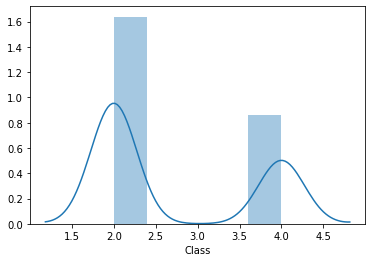

In [39]:
sns.distplot(breast_df['Class'])

### Multivariate analysis of our data.
2. The distribution of all the attributes

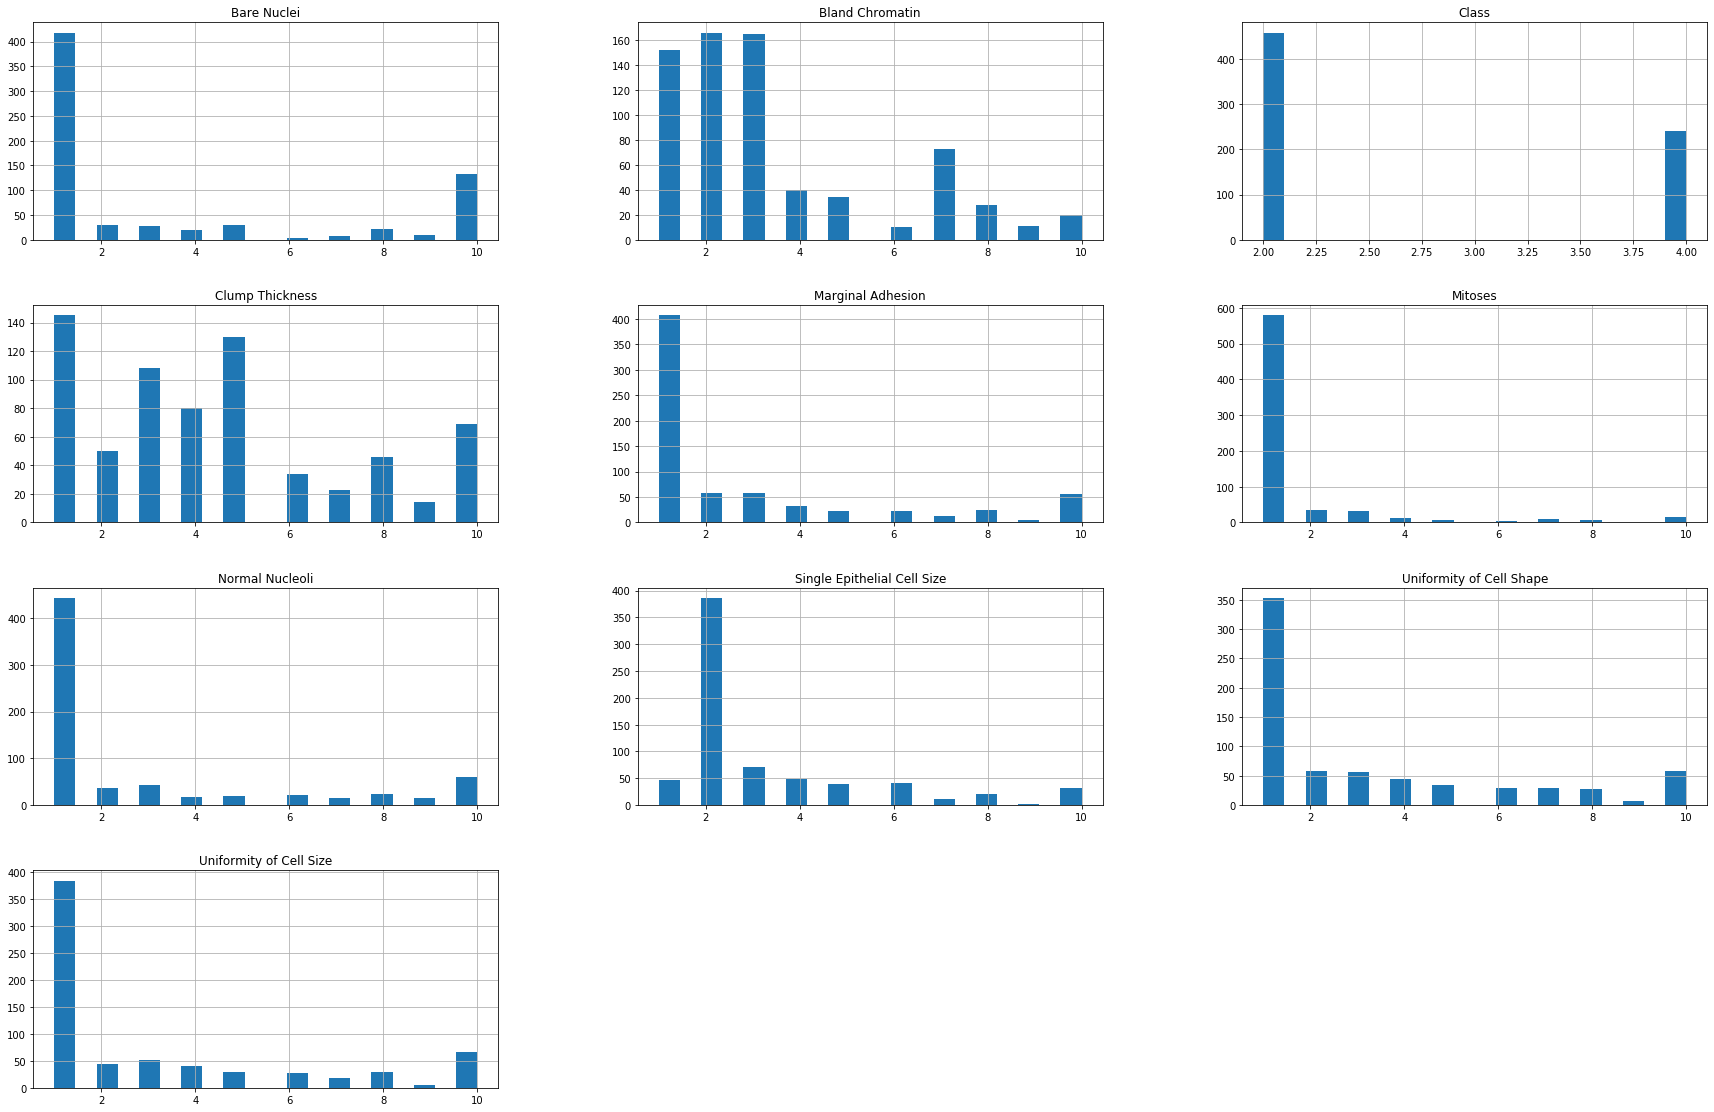

In [42]:
breast_df.hist(bins=20, figsize=(30,30), layout=(6,3));

There are a lot of 1 values in our dataset. 
3. We use box plot to help us visualize the outliers

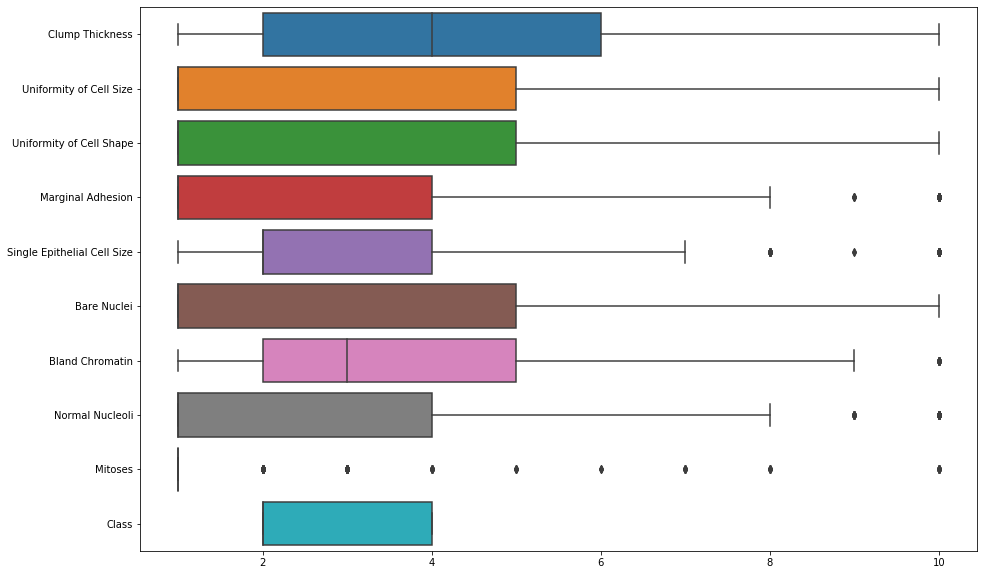

In [43]:
plt.figure(figsize=(15,10))
sns.boxplot(data=breast_df, orient='h')

The data is relatively uniform. The outliers in this case are not significant and cannot therefore affect our analysis.

The correlation analysis can also be used.

In [44]:
breast_df.corr()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Clump Thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.590008,0.558428,0.535835,0.350034,0.716001
Uniformity of Cell Size,0.644913,1.000000,0.906882,0.705582,0.751799,0.686673,0.755721,0.722865,0.458693,0.817904
Uniformity of Cell Shape,0.654589,0.906882,1.000000,0.683079,0.719668,0.707474,0.735948,0.719446,0.438911,0.818934
Marginal Adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666971,0.666715,0.603352,0.417633,0.696800
Single Epithelial Cell Size,0.521816,0.751799,0.719668,0.599599,1.000000,0.583701,0.616102,0.628881,0.479101,0.682785
Bare Nuclei,0.590008,0.686673,0.707474,0.666971,0.583701,1.000000,0.674215,0.574778,0.342397,0.818968
Bland Chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,0.674215,1.000000,0.665878,0.344169,0.756616
Normal Nucleoli,0.535835,0.722865,0.719446,0.603352,0.628881,0.574778,0.665878,1.000000,0.428336,0.712244
Mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.342397,0.344169,0.428336,1.000000,0.423170
Class,0.716001,0.817904,0.818934,0.696800,0.682785,0.818968,0.756616,0.712244,0.423170,1.000000


No negative correlation. Let us visualize this through a heat map. 

Discuss how the columns are related in terms of positive and negative correlation.

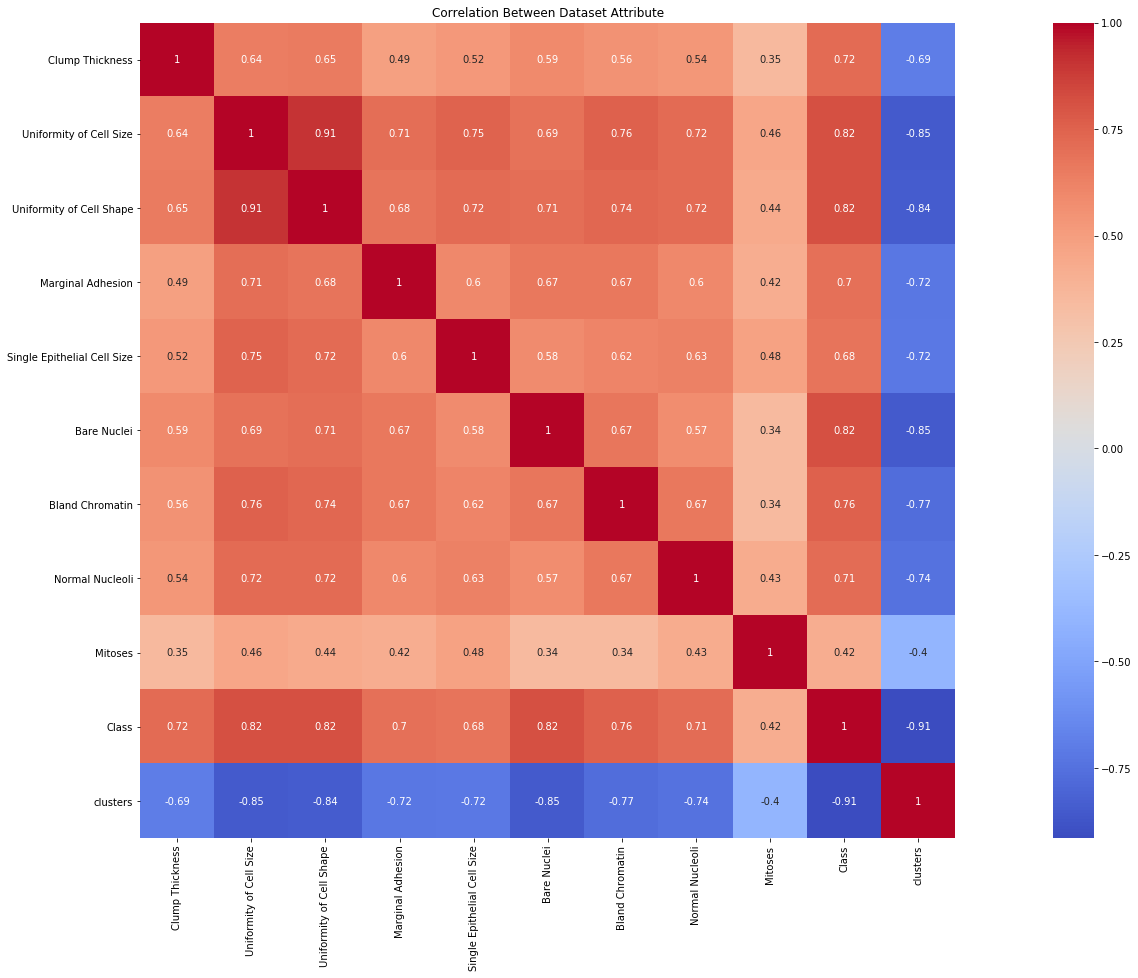

In [181]:
plt.figure(figsize=(35,15))
sns.heatmap(breast_df.corr(), vmax=1, square=True, annot=True, cmap='coolwarm')
plt.title('Correlation Between Dataset Attribute')
plt.show()

3. Pairplot

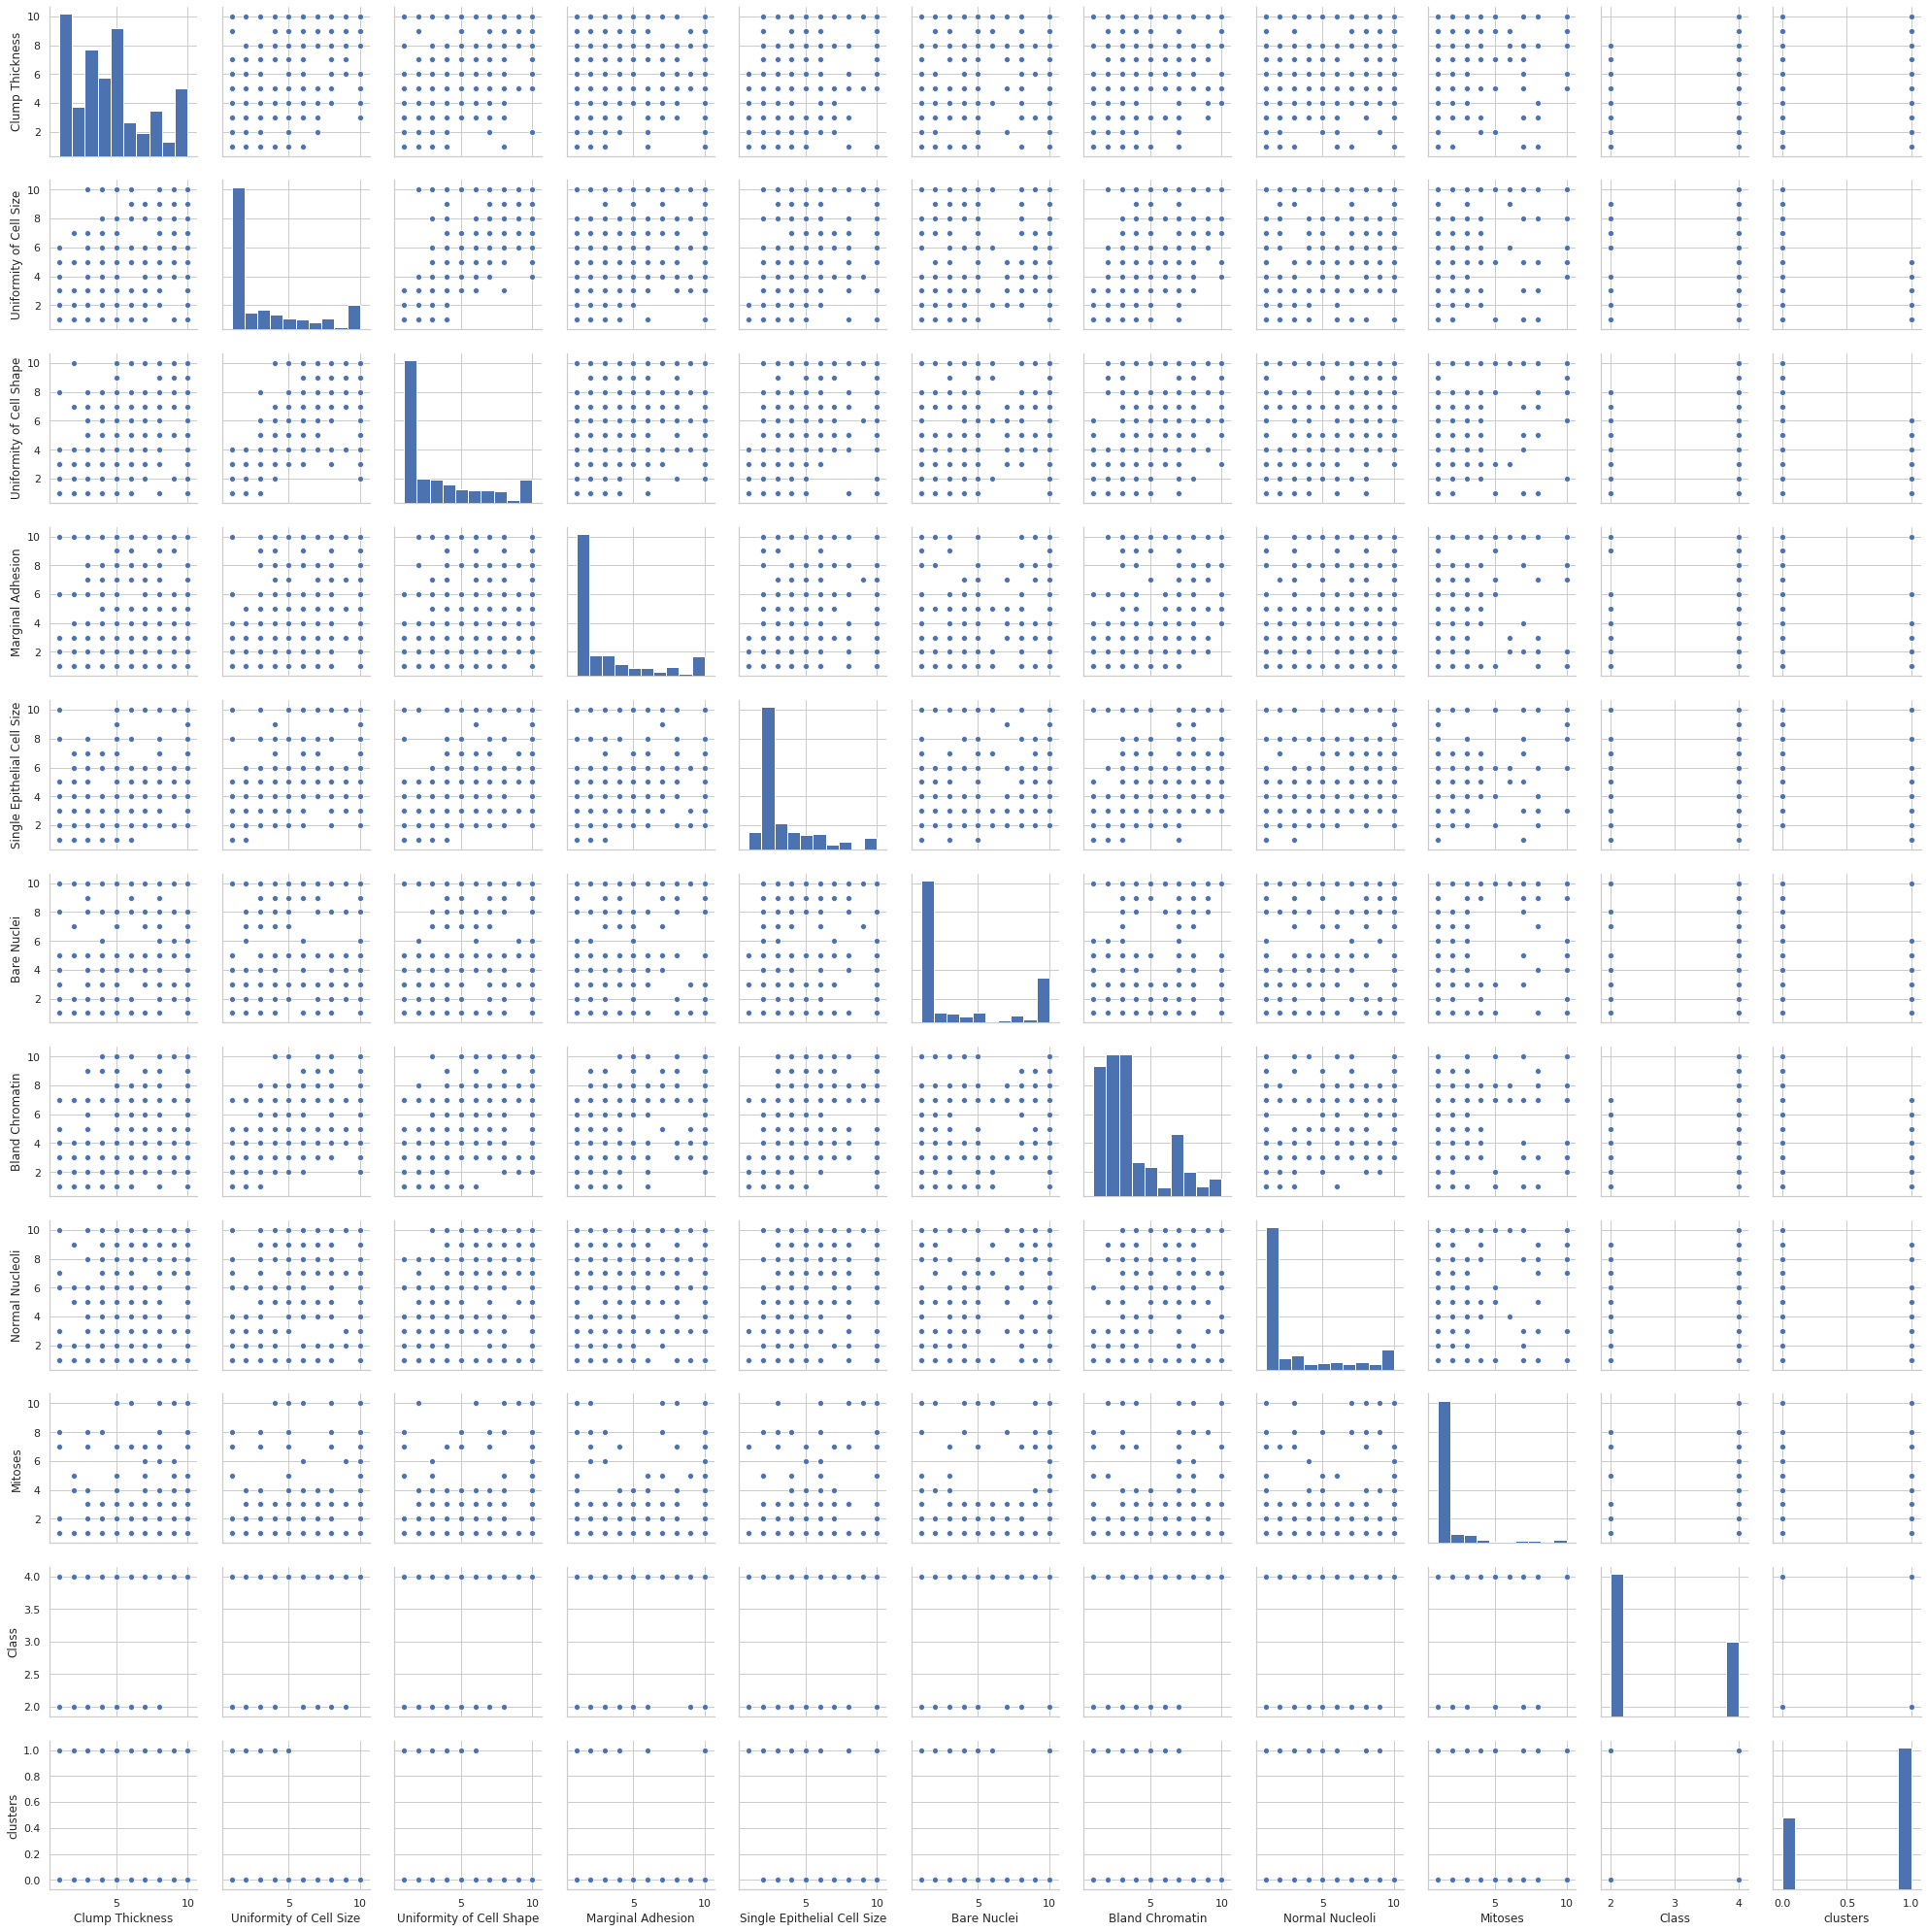

In [266]:
sns.pairplot(breast_df)

## Building our Model

In [51]:
# Splitting the data into dependent and independet variables
breast_X = breast_df.drop('Class', axis=1) # Independet variable
breast_Y = breast_df['Class'] # Dependent variable

In [182]:
# Split the variables into training and testing data
# ratio is 70:30, training and testing respectively

from sklearn.model_selection import train_test_split
breast_X_train, breast_X_test, breast_Y_train, breast_Y_test = train_test_split(breast_X, breast_Y, test_size=0.20, random_state=1)

## Predictive modelling
1. DecisionTree
2. LogisticRegression

In [183]:
# Linear regression

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0)
log.fit(breast_X_train, breast_Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [184]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion="entropy", random_state=0)
tree.fit(breast_X_train, breast_Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [185]:
# let us see how our model did
log_predicted = log.predict(breast_X_test)
log_predicted

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 4, 4, 2, 2, 2, 2, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4])

In [186]:
tree_predicted = tree.predict(breast_X_test)
tree_predicted

array([2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 2, 4, 2, 4, 4, 2, 2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4,
       4, 2, 4, 2, 2, 2, 4, 4])

In [109]:
# Validating the classifier
from scipy.stats import zscore

In [187]:
print("LinearRegression Classifier has predicted at :{0:.2g}% accuracy.".format(log.score(breast_X_test, breast_Y_test)))
print("DecisionTree Classifier has predicted at :{0:.2g}% accuracy.".format(tree.score(breast_X_test, breast_Y_test)))

LinearRegression Classifier has predicted at :0.97% accuracy.
DecisionTree Classifier has predicted at :0.92% accuracy.


### Validating/Evaluating the predictive model

#### 1. Classification report and Accuracy score

In [188]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print("Linear regressor classifier")
print(accuracy_score(breast_Y_test, log.predict(breast_X_test)))
print(classification_report(breast_Y_test, log.predict(breast_X_test)))


print("DecisionTree classifier")
print(accuracy_score(breast_Y_test, tree.predict(breast_X_test)))
print(classification_report(breast_Y_test, tree.predict(breast_X_test)))

Linear regressor classifier
0.9714285714285714
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        92
           4       0.98      0.94      0.96        48

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140

DecisionTree classifier
0.9214285714285714
              precision    recall  f1-score   support

           2       0.91      0.98      0.94        92
           4       0.95      0.81      0.88        48

    accuracy                           0.92       140
   macro avg       0.93      0.90      0.91       140
weighted avg       0.92      0.92      0.92       140



#### 2. Confusion Matrix

Confusion matrix for predictions


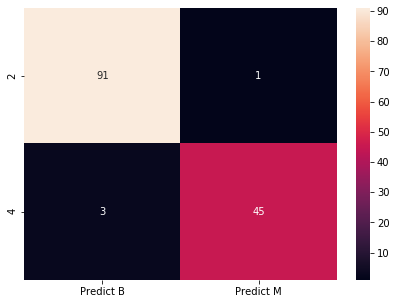

In [195]:
from sklearn import metrics
print("Confusion matrix for predictions")
cm = metrics.confusion_matrix(breast_Y_test, log_predicted, labels=[2,4])
df_cm = pd.DataFrame(cm, index=[i for i in [2,4]], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True);

Confusion matrix for predictions


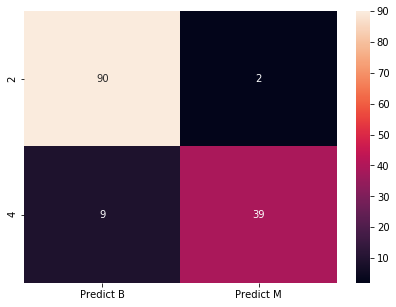

In [194]:
from sklearn import metrics
print("Confusion matrix for predictions")
cm = metrics.confusion_matrix(breast_Y_test, tree_predicted, labels=[2,4])
df_cm = pd.DataFrame(cm, index=[i for i in [2,4]], columns=[i for i in ['Predict B', 'Predict M']])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True);

#### 4. Root Mean Square

In [193]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [197]:
RMSE_tree = sqrt(mean_squared_error(breast_Y_test, tree_predicted))
RMSE_regr = sqrt(mean_squared_error(breast_Y_test, log_predicted))

In [198]:
RMSE_regr

0.3380617018914066

In [199]:
RMSE_tree

0.560611910581388

#### 4. Mean Absolute Error

In [201]:
print("DecisonTree Mean Absolute Error : ", mean_squared_error(breast_Y_test, tree_predicted))
print("Regression Mean Absolute Error : ", mean_squared_error(breast_Y_test, log_predicted))

DecisonTree Mean Absolute Error :  0.3142857142857143
Regression Mean Absolute Error :  0.11428571428571428


In [133]:
# Precisoin: all the 2 and 4 were precisely recognized as 
# as their respectively at 98 and 96 percent. 

# recall: Our algorithm was able to recall 2 at 98% 
#  and 96% as 4

## Descriptive modelling
1. KMeans
2. Basic summary statistics

In [260]:
# sns.pairplot(breast_df.iloc[:,:10], hue='Class')

In [170]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [171]:
breast_X = StandardScaler().fit_transform(breast_X)

Text(0.5, 1.0, 'KMeans clustering plot')

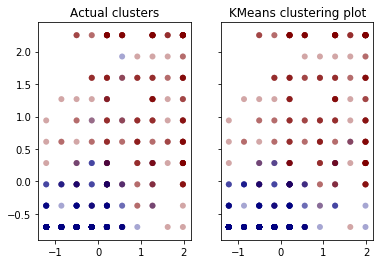

In [173]:
km = KMeans(n_clusters=2, init='k-means++', n_init=10)
km_pred = km.fit_predict(breast_X)

f, (ax1, ax2) = plt.subplots(1,2, sharey=True)
ax1.scatter(breast_X[:,0],breast_X[:,1], c=breast_df['Class'], cmap="jet", edgecolor="None", alpha=0.35)
ax1.set_title("Actual clusters")

ax2.scatter(breast_X[:, 0], breast_X[:,1], c=km_pred, cmap="jet", edgecolor="None", alpha=0.35)
ax2.set_title("KMeans clustering plot")

In [176]:
breast_df.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,clusters
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557,0.662375
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273,0.473239
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000,1.000000


## Patterns in Our Datasets
1. Swarm plots

In [241]:
breast_swarm = breast_df.drop('clusters', axis=1)

In [243]:
breast_swarm.rename(columns={"Class": "diagnosis"}, inplace=True)

In [255]:
y = breast_swarm['diagnosis']
x = breast_swarm.drop('diagnosis', axis=1)

In [256]:
X_norm = (x-x.mean())/(x.std())

data_swarmplots = pd.concat([y, x.iloc[:,:11]], axis=1)
data_swarmplots = pd.melt(data_swarmplot, id_vars="diagnosis", var_name="attributes", value_name="value")

data_swarmplot.head()

,diagnosis,attributes,value
0,2,Clump Thickness,5
1,2,Clump Thickness,5
2,2,Clump Thickness,3
3,2,Clump Thickness,6
4,2,Clump Thickness,4


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

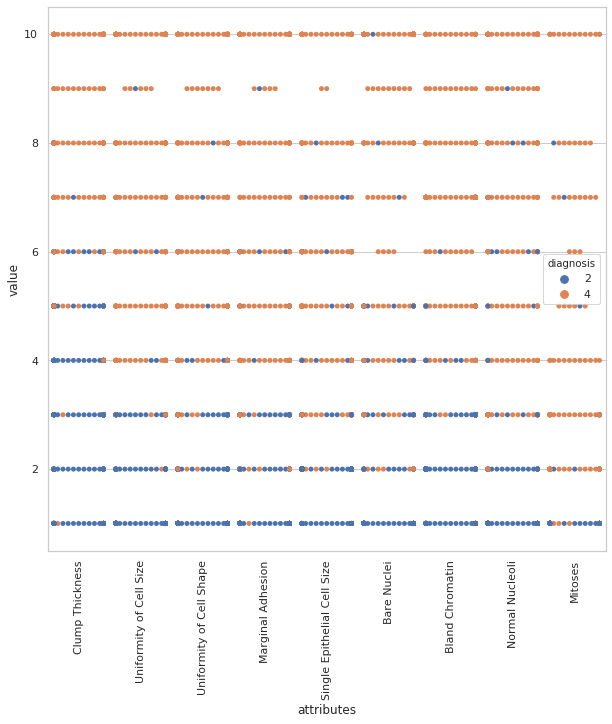

In [258]:
plt.figure(figsize=(10,10));
sns.swarmplot(x="attributes", y="value", hue="diagnosis", data=data_swarmplot)
plt.xticks(rotation=90)